In [1]:
from auto_python.RootReader import RootData

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import math



In [2]:
# 使用示例
root_data = RootData("../build/CompScintSim.root")

# 直接画图
# root_data.plot_ntuple([1,2])
# root_data.plot_h1()
# root_data.plot_h2()

# 保存数据和图像
fileName = "Test_output7"
# root_data.save(fileName)

root_data.save_simulation_data()

模拟数据已保存至 20250310150826.csv


'20250310150826.csv'

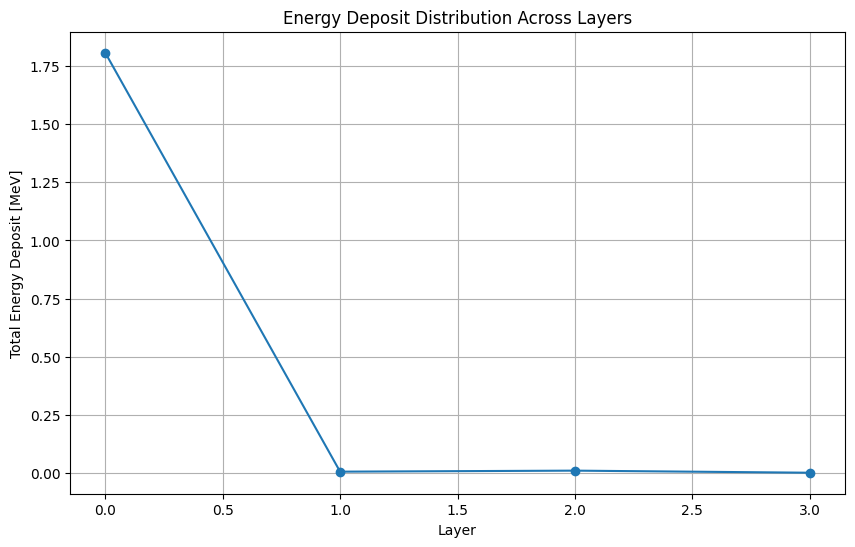

In [3]:
data_folder = fileName+'/data'

# 初始化一个空的 DataFrame 用于存储所有层的数据
all_data = pd.DataFrame()

# 读取文件名到列表中
file_list = [file_name for file_name in os.listdir(data_folder) if file_name.startswith('N_') and file_name.endswith('_energyDeposit.csv')]

# 按文件名中的层号排序
file_list.sort(key=lambda x: int(x.split('_')[1]))

# 遍历文件列表，从层号2开始
eng_list = []
x_list = range(0,len(file_list)) 
for file_name in file_list:
    file_path = os.path.join(data_folder, file_name)
    data = pd.read_csv(file_path)
    eng_list.append(data.sum())

eng_list = np.array(eng_list) / len(data)

# 绘制沉积能量分布图
plt.figure(figsize=(10, 6))
plt.plot(x_list, eng_list, marker='o')
plt.xlabel('Layer')
plt.ylabel('Total Energy Deposit [MeV]')
plt.title('Energy Deposit Distribution Across Layers')
plt.grid(True)
plt.show()

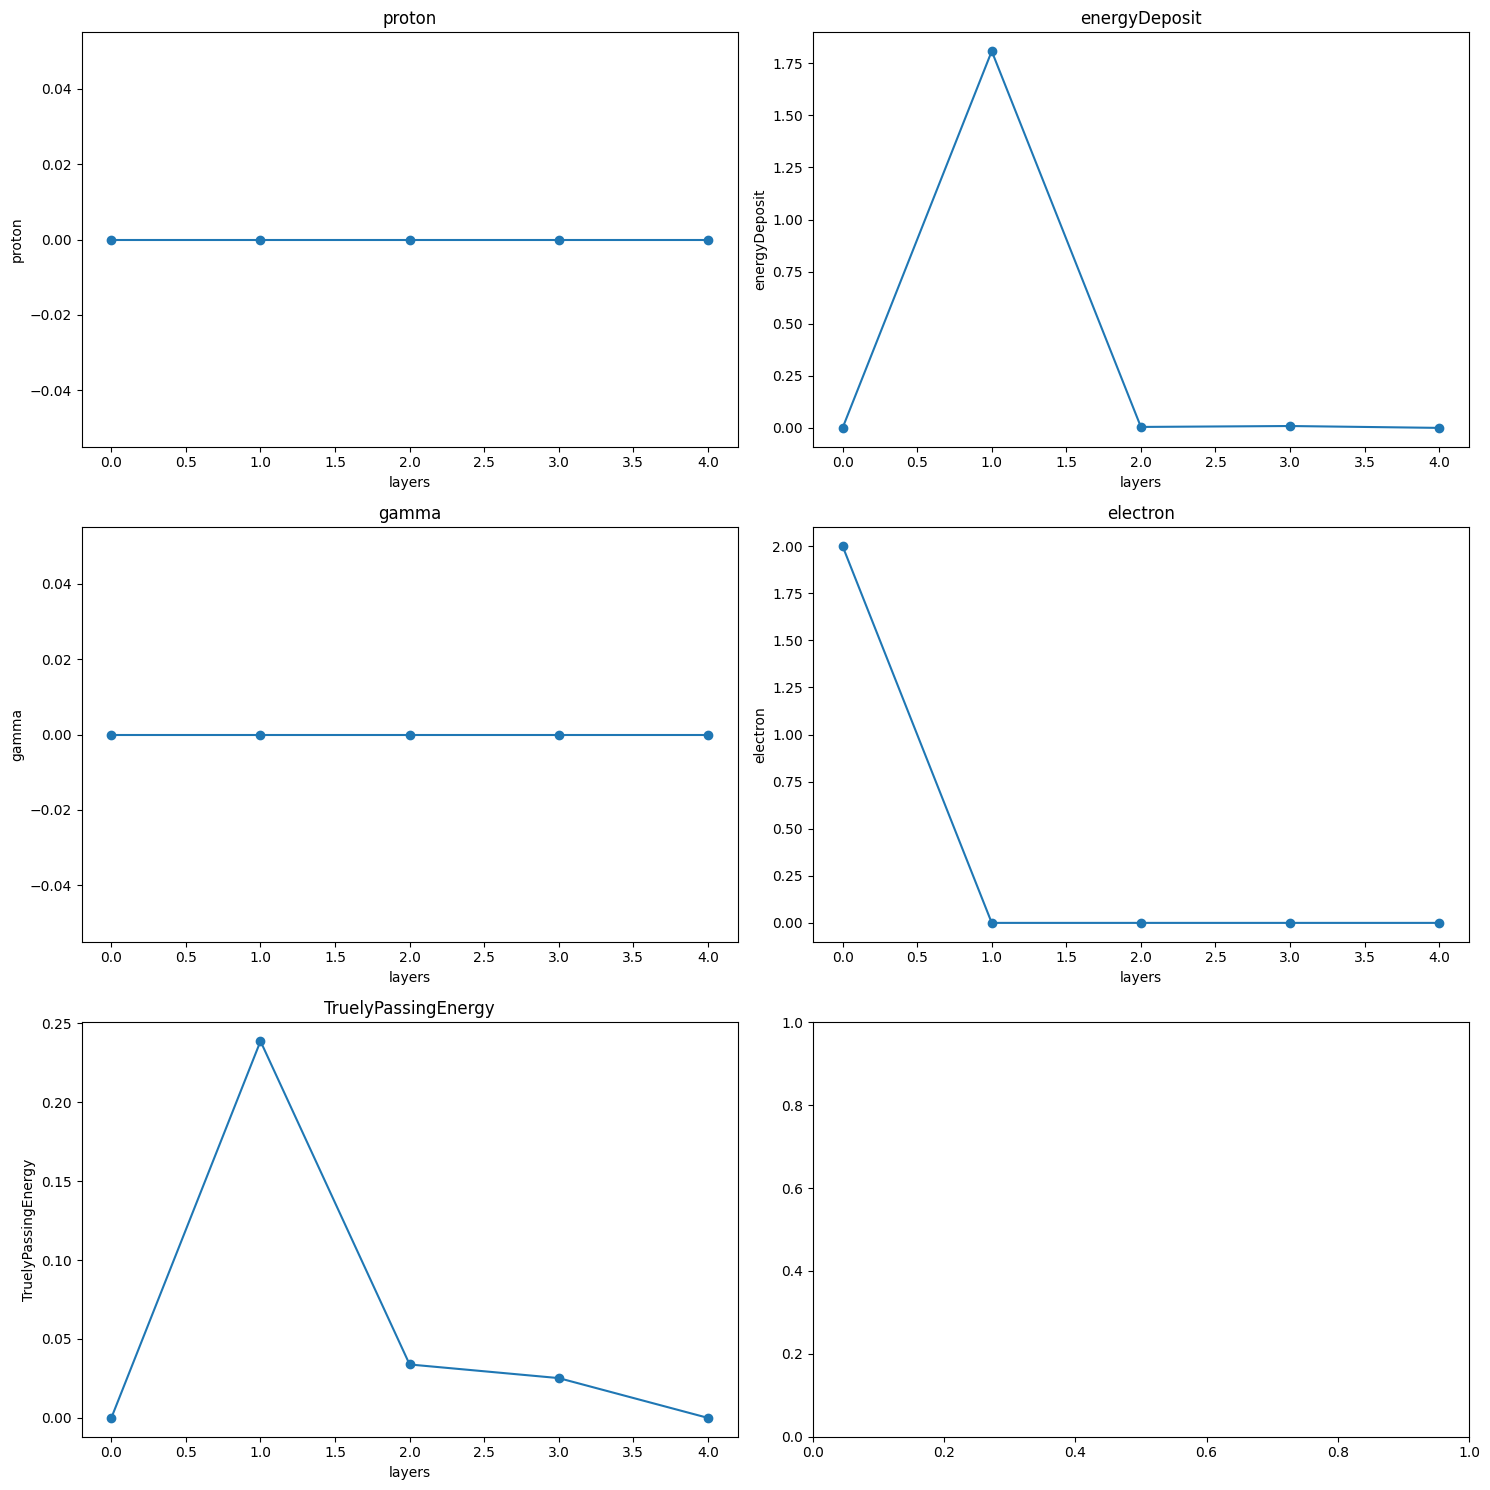

In [4]:
mean_data = fileName + r'/layers_mean.csv'
df = pd.read_csv(mean_data)
fields = df.columns[1:]
num_fields = len(fields)
num_rows = math.ceil(num_fields / 2)
fig, axes = plt.subplots(num_rows, 2, figsize=(15, num_rows * 5))

for i, field in enumerate(fields):
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    ax.plot(df['layers'], df[field], marker='o')
    ax.set_title(field)
    ax.set_xlabel('layers')
    ax.set_ylabel(field)

plt.tight_layout()
plt.show()